In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
ABIDE_FILE_NAME = "../ABIDE/datasets/children/asd/KKI_0050794_rois_aal.1D"
CORR_FILE_NAME = "../../generated_datasets/pearson_corr_raw/datasets/children/asd/KKI_0050794_rois_aal.1D"

In [3]:
def abide_file_to_numpy(filepath):

    with open(filepath, "r") as file: 
        reader = csv.reader(file, delimiter="\t")
        header = next(reader)
        rows = []
        for row in reader:
            rows.append(row)

    return np.array(rows).astype(float)

In [4]:
abide_array = abide_file_to_numpy(filepath=ABIDE_FILE_NAME)
corr_array = np.loadtxt(fname=CORR_FILE_NAME)

In [7]:
np.fill_diagonal(corr_array, 0)

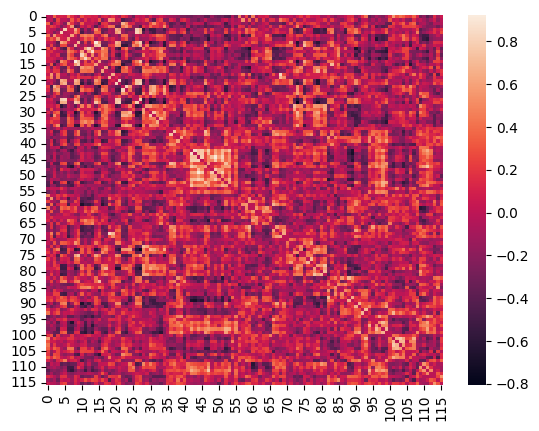

In [8]:
import seaborn as sns

ax = sns.heatmap(corr_array)
plt.show()

In [18]:
row, large_corr_col = np.unravel_index(corr_array.argmax(), corr_array.shape)
row, large_corr_col

(8, 14)

In [38]:
small_corr_col = corr_array[row].argmin()
small_corr_col

30

In [39]:
corr_array[row,large_corr_col], corr_array[row,small_corr_col]

(0.922523, -0.637141)

In [43]:
test = abs(corr_array[row].copy())
test.sort()
test

array([0.00000e+00, 4.74000e-04, 9.28500e-03, 1.27320e-02, 1.80490e-02,
       1.89390e-02, 2.22900e-02, 2.63650e-02, 2.64100e-02, 2.97620e-02,
       3.36790e-02, 3.52840e-02, 3.85790e-02, 3.87120e-02, 4.04780e-02,
       4.08370e-02, 4.18200e-02, 4.26400e-02, 4.67510e-02, 4.71200e-02,
       4.75240e-02, 5.81400e-02, 5.87710e-02, 6.20860e-02, 6.29270e-02,
       6.84370e-02, 6.93110e-02, 7.57400e-02, 8.25690e-02, 8.44870e-02,
       8.55870e-02, 8.62750e-02, 9.11370e-02, 9.17880e-02, 9.63880e-02,
       9.75110e-02, 9.79710e-02, 9.80700e-02, 1.07753e-01, 1.09879e-01,
       1.10799e-01, 1.17788e-01, 1.19703e-01, 1.26945e-01, 1.33945e-01,
       1.43285e-01, 1.43736e-01, 1.47867e-01, 1.54679e-01, 1.55271e-01,
       1.56883e-01, 1.57019e-01, 1.67340e-01, 1.67994e-01, 1.82580e-01,
       1.97455e-01, 1.99067e-01, 2.02561e-01, 2.03185e-01, 2.08559e-01,
       2.13975e-01, 2.14688e-01, 2.19400e-01, 2.23129e-01, 2.26613e-01,
       2.30834e-01, 2.39880e-01, 2.39948e-01, 2.48332e-01, 2.531

In [44]:
close_to_zero = 68
corr_array[row, 68]

0.000474

In [25]:
x = np.array([_ for _ in range(abide_array.shape[0])])
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122])

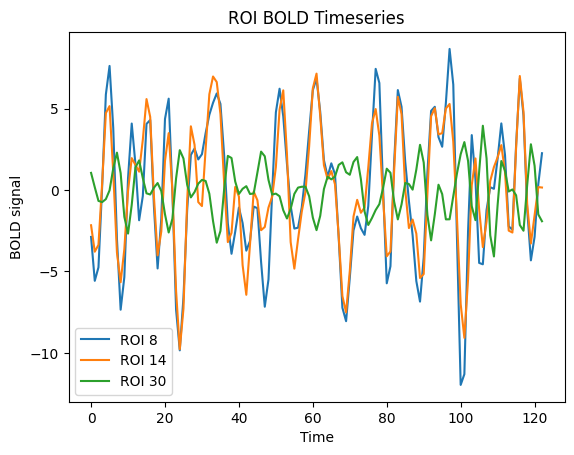

In [52]:
plt.clf()
plt.plot(x, abide_array[:, [row, large_corr_col, small_corr_col]])
plt.xlabel("Time")
plt.ylabel("BOLD signal")
plt.legend([f"ROI {row}", f"ROI {large_corr_col}", f"ROI {small_corr_col}"])
plt.title("ROI BOLD Timeseries")
plt.show()

In [ ]:
# SUBJECT: generated_datasets/pearson_corr_raw/datasets/children/asd/KKI_0050794_rois_aal.1D
# ROIS: 8, 14, 30 (range is 0 - 115)
